# Example of using PDielec to calculate a powder spectrum
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys
sys.path.insert(0, "../../..")     # This should allow the PDielec modules to be found
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum
from PDielec.HelperRoutines   import calculateDFTPermittivityObject
from PDielec.Utilities        import get_reader
from PDielec.Materials        import External


## Define the materials to be used.
First of all we will create a reader, read the output and see what the masses are

In [2]:
reader = get_reader('ZnO/OUTCAR','vasp','')
reader.read_output()
cell = reader.get_unit_cell()
masses = cell.get_atomic_masses()
masses[2] = 18
masses[3] = 19
reader.set_edited_masses(masses)

In [3]:
permittivityObject=calculateDFTPermittivityObject(reader,sigma=5.0)
ZnO_perverse = External('Dielectric layer',permittivityObject=permittivityObject,cell=cell)

In [4]:
reader.masses

[65.39, 65.39, 18, 19]

In [5]:
matrix = getMaterial('ptfe')
ZnO_default = getMaterial('ZnO/OUTCAR')

## Calculate the absorption using effective medium theory


In [6]:
frequencies = np.arange(200,500,0.2)
absorption1 = calculatePowderSpectrum(frequencies,ZnO_default,matrix,0.1) # Default is Maxwell-Garnett
absorption2 = calculatePowderSpectrum(frequencies,ZnO_perverse,matrix,0.1)

## Plot the absorption coefficent

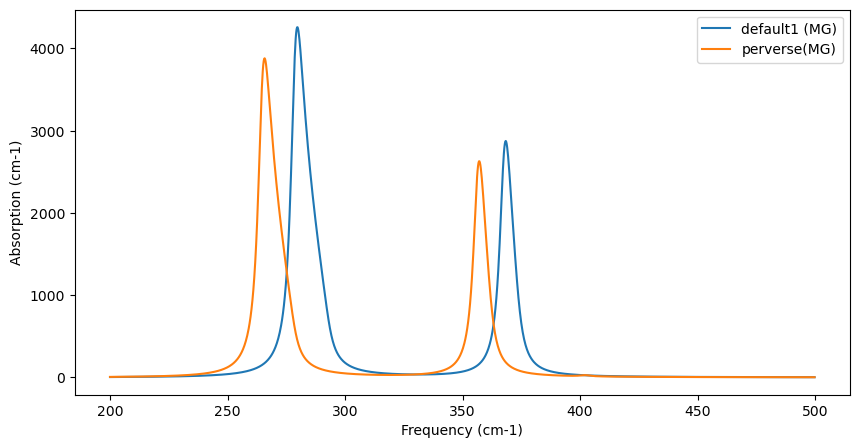

(<matplotlib.legend.Legend at 0x74d3ce719e90>, None)

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, absorption1,label='default1 (MG)') 
plt.plot(frequencies, absorption2,label='perverse(MG)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()